In [1]:
from __future__ import print_function

from keras.datasets import cifar10 
from keras.models import Sequential

from keras.models import model_from_json
from keras import backend as K
import matplotlib.pyplot as plt
import theano
import json

import os
os.chdir('C:/Users/Kimsarah/Desktop/SK_ML/code')


batch_size = 128
nb_classes = 10
nb_epoch = 20
# input image dimensions
img_rows, img_cols = 32, 32
# the CIFAR10 images are RGB
img_channels = 3


Using TensorFlow backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [2]:
# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
if K.image_dim_ordering() == 'th':
    X_test = X_test.reshape(X_test.shape[0], img_channels, img_rows, img_cols)
    input_shape = (img_channels, img_rows, img_cols)
else:
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, img_channels)
    input_shape = (img_rows, img_cols, img_channels)
X_test = X_test.astype('float32')
X_test /= 255
print(X_test.shape[0], 'test samples')


10000 test samples


In [3]:
# Reconstruct model
model = model_from_json(open('cifar10_model_architecture.json').read())
model.load_weights('cifar10_model_weights.h5')


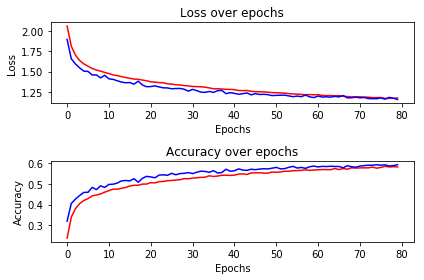

In [4]:
# Plot history 
hist = json.loads(open('cifar10_model_history.json').read())

plt.figure('history')
plt.subplot(211)
plt.title('Loss over epochs')
plt.plot(hist['loss'],'r',label='loss')
plt.plot(hist['val_loss'], 'b',label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(212)
plt.title('Accuracy over epochs')
plt.plot(hist['acc'],'r',label='acc')
plt.plot(hist['val_acc'], 'b',label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


In [5]:
# Get output of each layer
get_1st_layer_output = K.function([model.layers[0].input, K.learning_phase()], [model.layers[0].output])
get_2nd_layer_output = K.function([model.layers[0].input, K.learning_phase()], [model.layers[2].output])
get_3rd_layer_output = K.function([model.layers[0].input, K.learning_phase()], [model.layers[7].output])
get_last_layer_output = K.function([model.layers[0].input, K.learning_phase()], [model.layers[10].output])
print('X_test image shape:', X_test.shape)
layer_1_output = get_1st_layer_output([X_test,0])[0]
print('Print 1st layer output', layer_1_output.shape)
layer_2_output = get_2nd_layer_output([X_test,0])[0]
print('Print 2nd layer output', layer_2_output.shape)
layer_3_output = get_3rd_layer_output([X_test,0])[0]
print('Print 3rd layer output', layer_3_output.shape)
layer_last_output = get_last_layer_output([X_test,0])[0]
print('Print last layer output', layer_last_output.shape)


X_test image shape: (10000, 32, 32, 3)
Print 1st layer output (10000, 28, 28, 5)
Print 2nd layer output (10000, 24, 24, 5)
Print 3rd layer output (10000, 128)
Print last layer output (10000, 10)


In [6]:
# Predict classes and probability
print('Predict classes')
classes = model.predict_classes(X_test, batch_size)
print('Predict probability')
proba = model.predict_proba(X_test, batch_size)


Predict classes
 9984/10000 [============================>.] - ETA: 0s

In [7]:
# Plot output of each layer
def plotvalue(index):
        plt.figure('Input data and 1~4 layer output value of X_test[{idx}]'.format(idx=index), figsize=(12,9), dpi=100)
        plt.subplot2grid((5,8),(0,0),rowspan=2,colspan=2)
        plt.title('Input data')
        plt.imshow(X_test[index])

        plt.subplot2grid((5,8),(0,2))
        plt.imshow(layer_1_output[index][:,:,0], cmap='bone', interpolation='nearest')
        plt.subplot2grid((5,8),(0,3))
        plt.imshow(layer_1_output[index][:,:,1], cmap='bone', interpolation='nearest')
        plt.subplot2grid((5,8),(0,4))
        plt.imshow(layer_1_output[index][:,:,2], cmap='bone', interpolation='nearest')
        plt.subplot2grid((5,8),(1,2))
        plt.imshow(layer_1_output[index][:,:,3], cmap='bone', interpolation='nearest')
        plt.subplot2grid((5,8),(1,3))
        plt.imshow(layer_1_output[index][:,:,4], cmap='bone', interpolation='nearest')

        plt.subplot2grid((5,8),(0,5))
        plt.imshow(layer_2_output[index][:,:,0], cmap='bone', interpolation='nearest')
        plt.subplot2grid((5,8),(0,6))
        plt.imshow(layer_2_output[index][:,:,1], cmap='bone', interpolation='nearest')
        plt.subplot2grid((5,8),(0,7))
        plt.imshow(layer_2_output[index][:,:,2], cmap='bone', interpolation='nearest')
        plt.subplot2grid((5,8),(1,5))
        plt.imshow(layer_2_output[index][:,:,3], cmap='bone', interpolation='nearest')
        plt.subplot2grid((5,8),(1,6))
        plt.imshow(layer_2_output[index][:,:,4], cmap='bone', interpolation='nearest')

        plt.subplot2grid((5,8),(2,0),colspan=8)
        plt.imshow(layer_3_output[index].reshape(1,layer_3_output.shape[1]), cmap='bone', interpolation='nearest')

        plt.subplot2grid((5,8),(3,0),colspan=8)
        plt.title('probability prediction')
        plt.plot(proba[index],'r',label='probability')

        plt.subplot2grid((5,8),(4,0),colspan=8)
        plt.title('Last layer output={ans}, y_test={sol}'.format(ans=classes[index],sol=y_test[index]))
        plt.imshow(layer_last_output[index].reshape(1,layer_last_output.shape[1]), cmap='bone', interpolation='nearest')

        plt.tight_layout()
        plt.show()

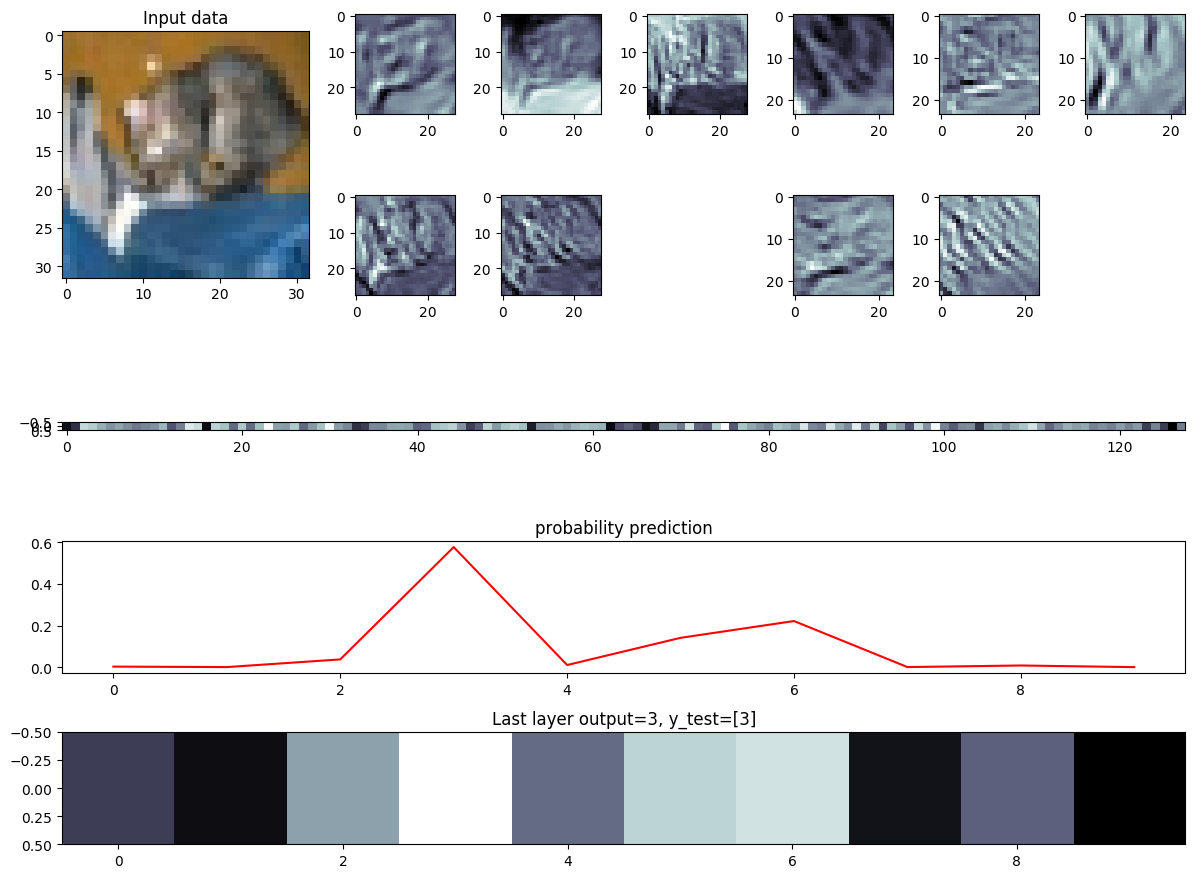

In [8]:

# Plot test data
plotvalue(0)


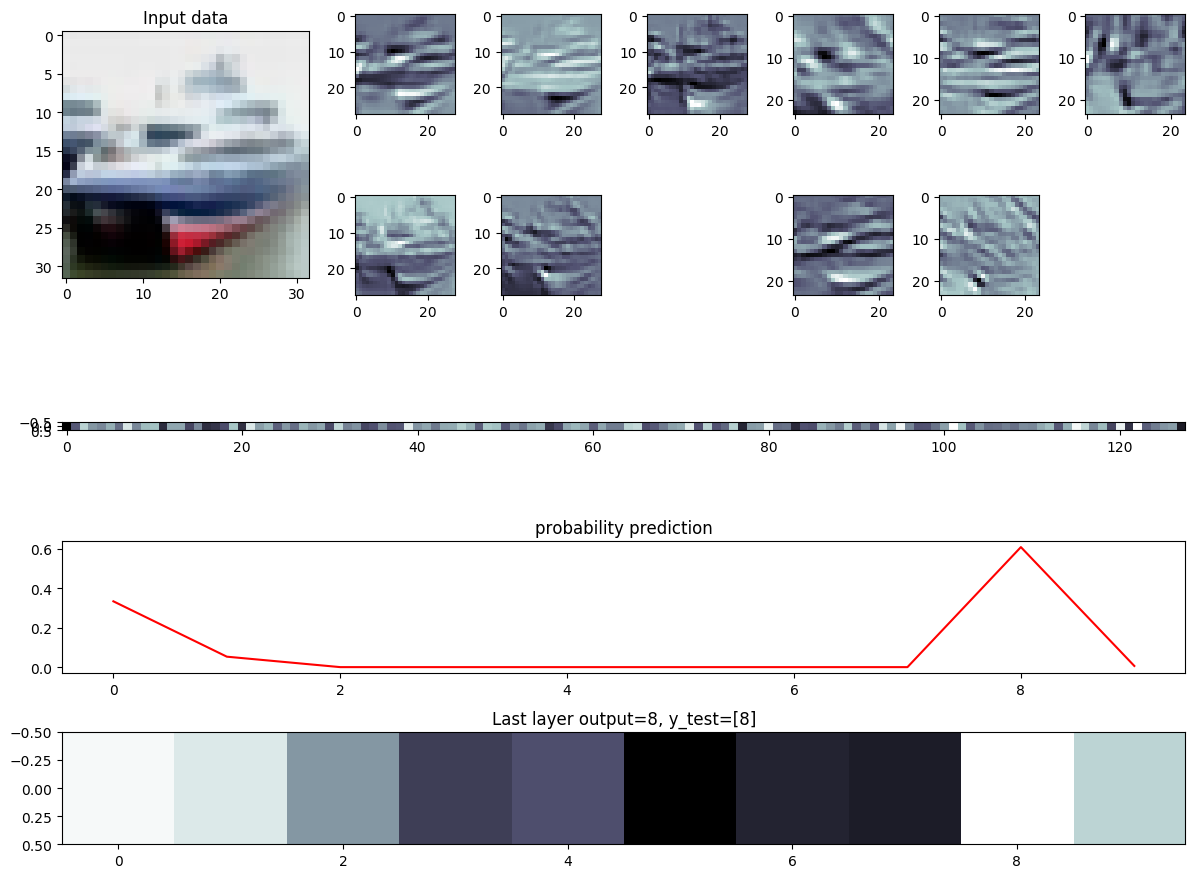

In [9]:
plotvalue(1)

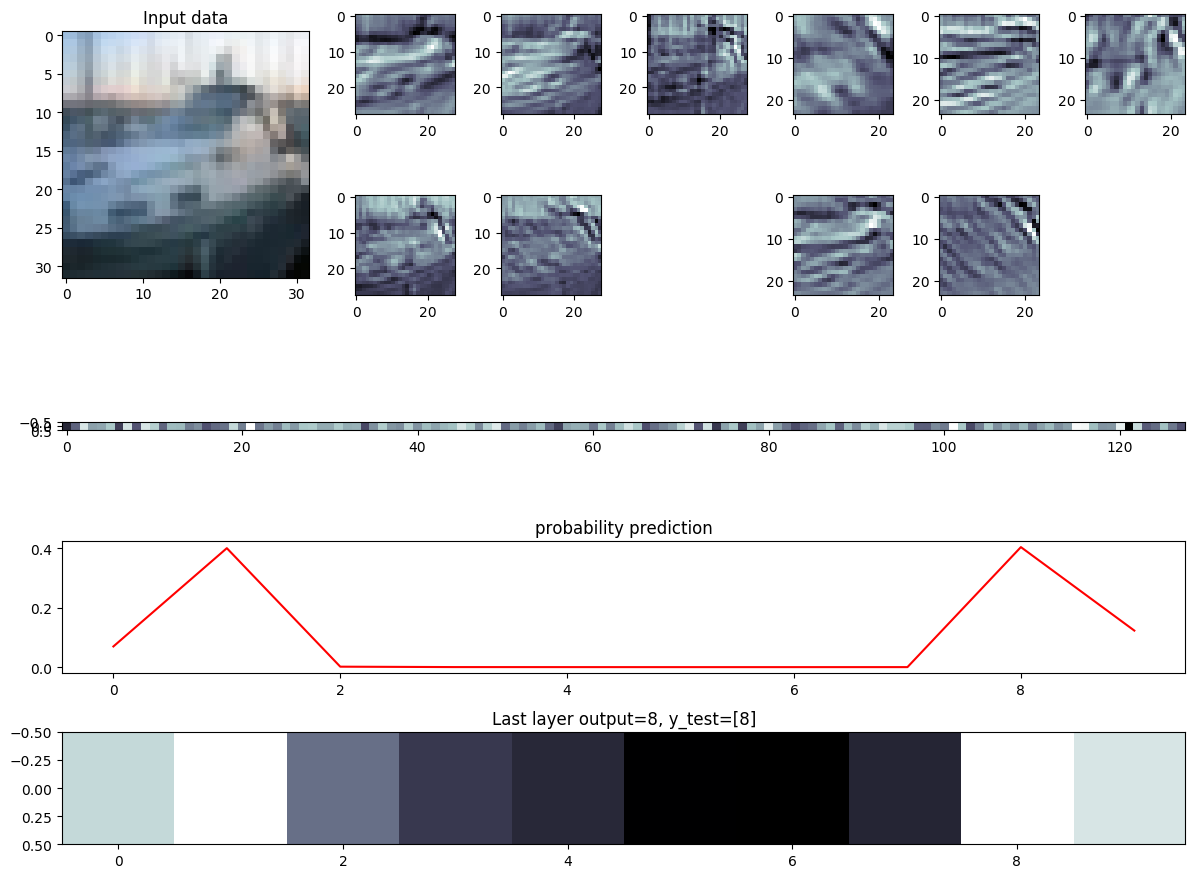

In [10]:
plotvalue(2)